In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from scipy import integrate

In [2]:
from bs4 import BeautifulSoup # For HTML parsing
import urllib2 # Website connections
import re # Regular expressions
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd # For converting results to a dataframe and bar chart plots
%matplotlib inline

In [3]:
import scipy.stats as stats

#### learn:np.concatenate (well, it just link two arrays)

In [4]:
a=[1,2]
b=[3,4]
print np.concatenate((a,b))
print type(np.concatenate((a,b)))

[1 2 3 4]
<type 'numpy.ndarray'>


#### t-test (one sample)

( http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html)

In [18]:
np.random.seed(6)         # choose a specific seed if we'd like to see the results to be the same all the time.

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

taitung_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
taitung_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
taitung_ages = np.concatenate((taitung_ages1, taitung_ages2))

print( population_ages.mean() )
print( taitung_ages.mean() )

43.000112
39.26


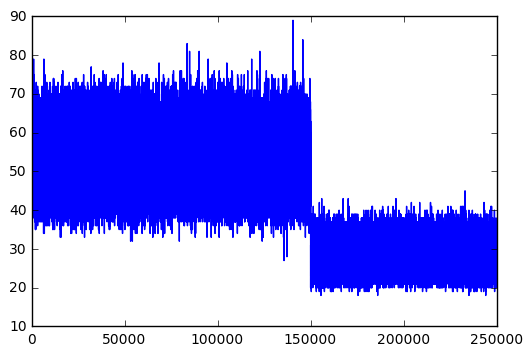

In [19]:
plt.plot(population_ages)

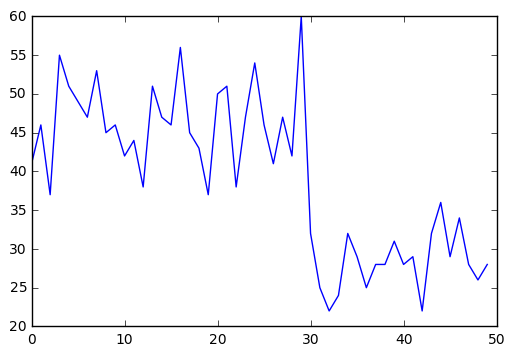

In [20]:
plt.plot(taitung_ages)

In [21]:
stats.ttest_1samp(a= taitung_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

(-2.5742714883655027, 0.013118685425061678)

>The test result shows the test statistic "t" is equal to -2.574. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. 

In [22]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [23]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.0095752344892088

In [24]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*

0.013121066545690117

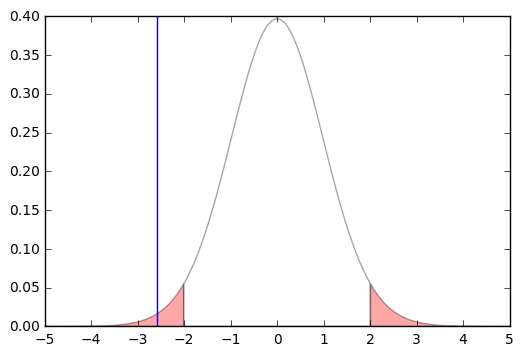

In [25]:
def f(x):
    return stats.t.pdf(x, df=49)

x=np.arange(-5,-2.0096,0.01)
y=f(x)
plt.fill_between(x,y,facecolor='red',alpha=0.35)

x=np.arange(-2.0096,2.0096,0.01)
y=f(x)
plt.fill_between(x,y,facecolor='white',alpha=0.35)

x=np.arange(2.0096,5,0.01)
y=f(x)
plt.fill_between(x,y,facecolor='red',alpha=0.35)

plt.xlim(-5,5)
plt.xticks(np.arange(-5, 5+1, 1.0))
plt.axvline(-2.5742)

we reject the null hypothesis according to the figure above ( $95\%$ confidence level).

#### Poission distribution

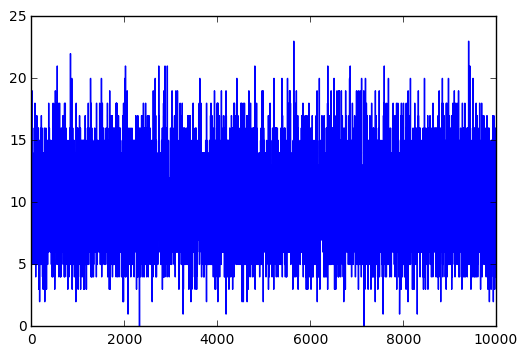

In [26]:
rvsPoission=stats.poisson.rvs(loc=0, mu=10, size=1.E4)
plt.plot(rvsPoission, markersize=0.1,marker=".")

1001


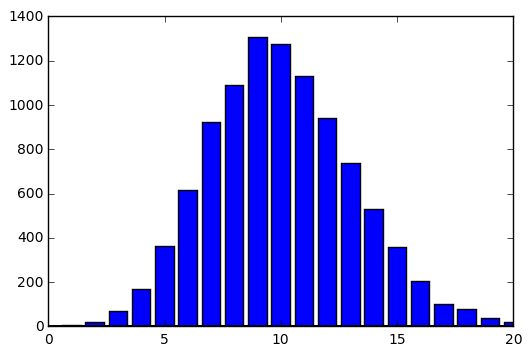

In [27]:
hist, bins =np.histogram(rvsPoission,bins=1.E3)
plt.bar(bins[:-1],hist, align='center')
plt.xlim(0,20)
print len(bins)
#print sum(hist*(bins[1]-bins[0]))

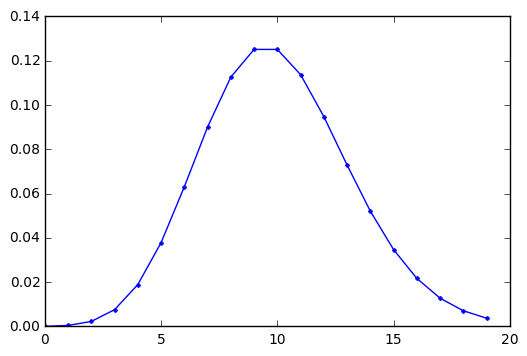

In [28]:
pdfPoission = stats.poisson.pmf(xrange(20), mu=10)
plt.plot(pdfPoission, markersize=5,marker=".")

-----

##### Sierpinski triangle

1. 在平面上決定三個點(不需要把它們畫出來)，此三點將形成一個三角形。
2. 隨機選取此三角形的任意頂點(也就是從剛所決定的三個點中隨機選取一個點)，此點為一個隨機旅行者的所在位置。
3. 再次隨機選取此三角形的任意頂點。並且讓隨機旅行者移動至該頂點和旅行者的所在位置的一半。
4. 畫出旅行者的所在位置。
5. 重複步驟三。

In [33]:
print "hello word"

hello word


In [33]:
list=["hello",1,2,3,"hi"]

In [34]:
for a in list:
    print a

hello
1
2
3
hi


In [7]:
v=np.array([[0,np.sqrt(3.)/2.],[-0.5,0],[0.5,0]])
print np.sqrt(3.)/2.

0.866025403784


In [40]:
print v

[[ 0.         0.8660254]
 [-0.5        0.       ]
 [ 0.5        0.       ]]


In [42]:
print v[2][0]

0.5


In [44]:

print range(10)

for i in range(10):
    print i

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
1
2
3
4
5
6
7
8
9


In [ ]:

#v=np.array([[0,np.sqrt(3.)/2.],[-0.5,0],[0.5,0]])
vx=[0,-0.5,0.5]
vy=[np.sqrt(3.)/2.,0,0]

n=100000

v_ix=vx[0]
v_iy=vy[0]
v_walker_x=v_ix
v_walker_y=v_iy
#v_walker=[0.0,0.3]

x=[]
y=[]
for i in range(n):
    v_rand=randint(0,2)
    v_selected=v[v_rand]
    v_walker=0.5*(v_walker+v_selected)
    x.append(v_walker[0])
    y.append(v_walker[1])

In [6]:
v=np.array([[0,np.sqrt(3.)/2.],[-0.5,0],[0.5,0]])
print np.sqrt(3.)/2.

n=100000
v_i=v[0]
v_walker=v_i
#v_walker=[0.0,0.3]

x=[]
y=[]
for i in range(n):
    v_rand=randint(0,2)
    v_selected=v[v_rand]
    v_walker=0.5*(v_walker+v_selected)
    x.append(v_walker[0])
    y.append(v_walker[1])

0.866025403784


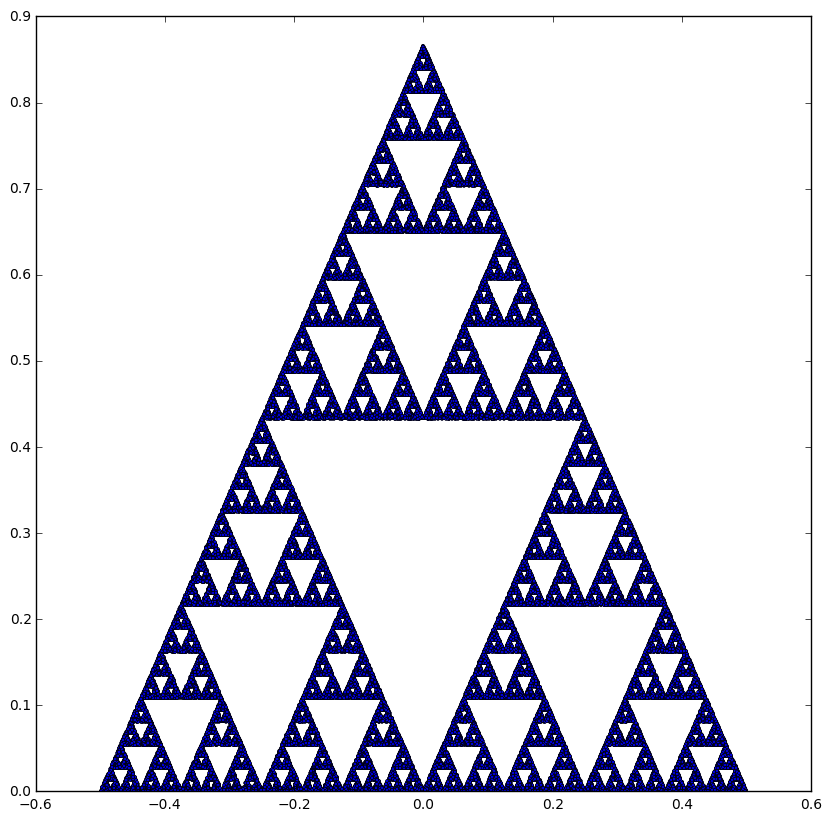

In [7]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(x,y,ls= 'None',marker="o",markersize=2)

#### integration

In [20]:
class integration:
    def __init__(self,x,f):
        self.x=x      # x
        self.f=f      # f
        self.fx=f(x)  # f(x)
    def rectangle(self):
        dx=x[1]-x[0]
        return np.sum( (f(x+dx) *dx) [0:-1] )
    def simpson(self):
        return scipy.integrate.simps(self.fx,self.x)
    def gaussian_quad(self):
        return scipy.integrate.quadrature(f, x[0], x[-1])[0]
    def plot(self):
        plt.plot(self.x,self.fx,'ro')
        plt.xlim(xmin=self.x[0],xmax=self.x[-1])
        plt.show()

In [31]:
def f(x):
    #return x-x+1.
    return np.cos(x)
x=np.linspace(0.,2.*np.pi,1e3)

myfunc=integration(x,f)

result1=myfunc.rectangle()
result2=myfunc.simpson()
result3=myfunc.gaussian_quad()

print result1,result2,result3

1.11022302463e-16 -2.07329199009e-08 -4.49961195257e-12


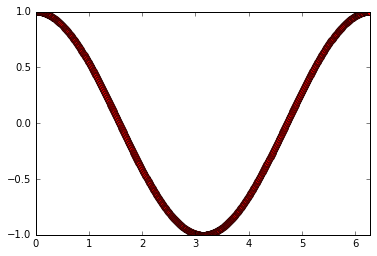

In [32]:
myfunc.plot()